In [3]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels
import statsmodels.sandbox.stats.multicomp

%matplotlib inline

## ЦПТ для бернулевских случайных величин

In [43]:
hits = 0.
count = 0.

for _ in range(10000):
    data_fst = scipy.stats.bernoulli.rvs(0.7, size=10)
    data_snd = scipy.stats.bernoulli.rvs(0.2, size=8)

    count += 1
    if scipy.stats.ttest_ind(data_fst, data_snd, equal_var=False).pvalue < 0.05:
        hits += 1

print(hits / count)

0.5941


In [42]:
hits = 0.
count = 0.

for _ in range(10000):
    data_fst = scipy.stats.bernoulli.rvs(0.5, size=10)
    data_snd = scipy.stats.bernoulli.rvs(0.5, size=8)

    count += 1
    if scipy.stats.ttest_ind(data_fst, data_snd, equal_var=False).pvalue < 0.05:
        hits += 1

print(hits / count)

0.0469


## Bootstrap

In [5]:
def my_bootstrap(data_fst, data_snd, iters=1000, plot=True):
    values = []
    for _ in range(iters):
        values.append(
            np.random.choice(data_fst, replace=True, size=len(data_fst)).mean()
            -
            np.random.choice(data_snd, replace=True, size=len(data_snd)).mean()
        )
        
    if plot:
        plt.hist(values, bins=30)
        plt.show()
        
    return np.percentile(values, [2.5, 97.5])

0.655128749084


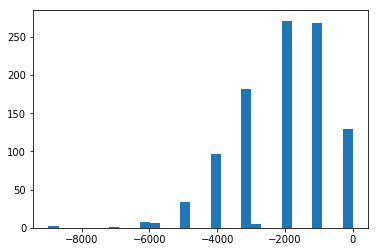

[ -4.98994561e+03   5.05811797e-01]


In [15]:
data_fst = np.append(np.random.normal(0, 10, size=1000), [-1000000, -1000000])
data_snd = np.random.normal(0, 1, size=100)

print(scipy.stats.ttest_ind(data_fst, data_snd).pvalue)
print(my_bootstrap(data_fst, data_snd, iters=1000, plot=True))

0.655230724757


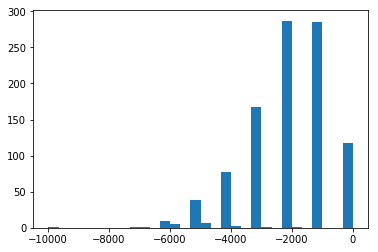

[ -4.98942621e+03   1.07899429e+00]


In [20]:
data_fst = np.append(np.random.normal(1, 10, size=1000), [-1000000, -1000000])
data_snd = np.random.normal(0, 1, size=100)

print(scipy.stats.ttest_ind(data_fst, data_snd).pvalue)
print(my_bootstrap(data_fst, data_snd, iters=1000, plot=True))

In [17]:
hits = 0.
count = 0.

for _ in range(1000):
    data_fst = np.append(np.random.normal(11, 10, size=1000), [-1000000, -1000000])
    data_snd = np.random.normal(10, 1, size=100)

    lower, upper = my_bootstrap(data_fst, data_snd, plot=False, iters=1000)
    count += 1
    if not (lower < 0 < upper):
        hits += 1

print(hits / count)

0.0


In [18]:
hits = 0.
count = 0.

for _ in range(1000):
    data_fst = np.append(np.random.normal(10, 10, size=1000), [-1000000, -1000000])
    data_snd = np.random.normal(10, 1, size=100)

    lower, upper = my_bootstrap(data_fst, data_snd, plot=False, iters=1000)
    count += 1
    if not (lower < 0 < upper):
        hits += 1

print(hits / count)

0.183


## Перестановочные тесты

In [21]:
def my_test(data_fst, data_snd, iters=1000, plot=True):
    data = np.array(list(data_fst) + list(data_snd))
    size = len(data)
    values = []
    fst_ratio = len(data_fst) * 1. / size
    for _ in range(iters):
        mask = (np.random.random(size=size) < fst_ratio)
        values.append(data[mask].mean() - data[~mask].mean())
        
    if plot:
        plt.hist(values, bins=30)
        plt.show()
        
    return (np.abs(values) > np.abs(data_fst.mean() - data_snd.mean())).mean()

0.160925692629


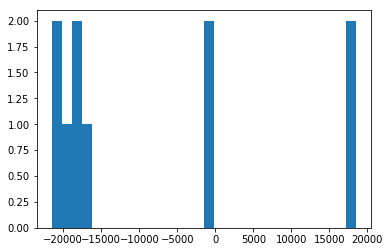

0.2


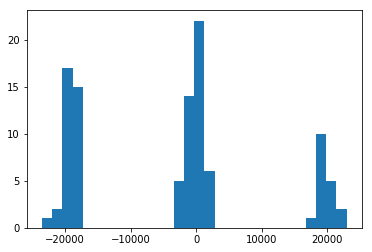

0.25


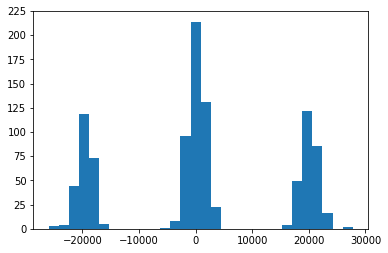

0.287


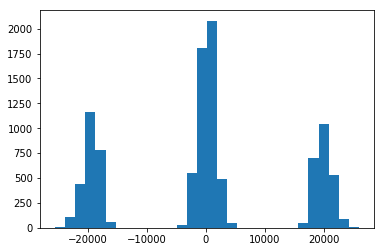

0.2581


In [31]:
data_fst = np.append(np.random.normal(0, 10, size=100), [-1000000, -1000000])
data_snd = np.random.normal(0, 1, size=100)

print(scipy.stats.ttest_ind(data_fst, data_snd).pvalue)
print(my_test(data_fst, data_snd, iters=10))
print(my_test(data_fst, data_snd, iters=100))
print(my_test(data_fst, data_snd, iters=1000))
print(my_test(data_fst, data_snd, iters=10000))

0.160894499687


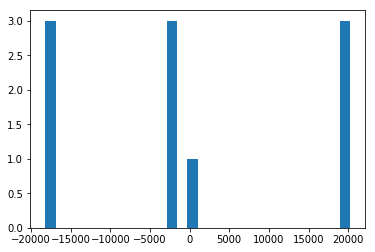

0.2


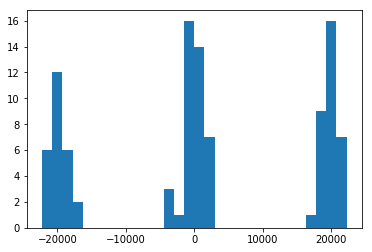

0.32


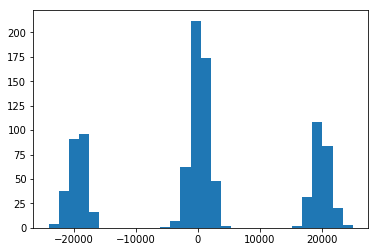

0.226


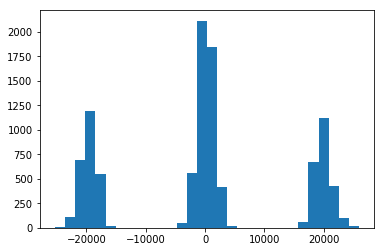

0.2391


In [32]:
data_fst = np.append(np.random.normal(0, 10, size=100), [-1000000, -1000000])
data_snd = np.random.normal(1, 1, size=100)

print(scipy.stats.ttest_ind(data_fst, data_snd).pvalue)
print(my_test(data_fst, data_snd, iters=10))
print(my_test(data_fst, data_snd, iters=100))
print(my_test(data_fst, data_snd, iters=1000))
print(my_test(data_fst, data_snd, iters=10000))

In [37]:
hits = 0.
count = 0.

for _ in range(1000):
    data_fst = np.append(np.random.normal(1, 10, size=1000), [-1000000, -1000000])
    data_snd = np.random.normal(0, 1, size=100)

    count += 1
    if my_test(data_fst, data_snd, plot=False, iters=1000) < 0.05:
        hits += 1

print(hits / count)

0.0


In [38]:
hits = 0.
count = 0.

for _ in range(1000):
    data_fst = np.append(np.random.normal(0, 10, size=1000), [-1000000, -1000000])
    data_snd = np.random.normal(0, 1, size=100)

    count += 1
    if my_test(data_fst, data_snd, plot=False, iters=1000) < 0.05:
        hits += 1

print(hits / count)

0.0


Нулевая гипотеза теста, что распределения совпадают:

In [39]:
hits = 0.
count = 0.

for _ in range(1000):
    data_fst = np.append(np.random.normal(1, 1, size=1000), [-1000000, -1000000])
    data_snd = np.random.normal(0, 1, size=100)

    count += 1
    if my_test(data_fst, data_snd, plot=False, iters=1000) < 0.05:
        hits += 1

print(hits / count)

0.0


In [40]:
hits = 0.
count = 0.

for _ in range(1000):
    data_fst = np.append(np.random.normal(0, 1, size=1000), [-1000000, -1000000])
    data_snd = np.random.normal(0, 1, size=100)

    count += 1
    if my_test(data_fst, data_snd, plot=False, iters=1000) < 0.05:
        hits += 1

print(hits / count)

0.0


## Комментарии

На семинаре на заданных выборках без выбросов бутстрап давал более точные результаты при тестировании нулевой гипотезы о равенстве средних в двух выборках, чем критерий Стьюдента. При этом он демонстрировал хорошую мощность и допустимую корректность.

При добавлении двух выбросов в одну из выборок и бутстрап, и критерий Стьюдента не позволяют отвергнуть нулевую гипотезу о равенстве средних. При этом мощность бутстрапа равна 0, а корректность превышает 10%, что не допустимо при заданном уровне значимости 95%. Это связано с тем, что разница средних на двух генерируемых выборках небольшая, при этом в случае если выбросы попадают в подвыборку на какой-либо итерации бутстрапа, они сильно смещают среднее по этой подвыборке в отрицательную сторону, следовательно разница между средними в двух анализируемых подвыборках становится существенной. В результате бутстрап выдает широкий доверительный интервал для разницы между средними на двух выборках, который не позволяет уловить небольшую наблюдаемую разницу между средними.

При использовании перестановочных тестов в качестве критерия проверки нулевой гипотезы о равенстве средних на двух выборках мы также не можем отвергнуть нулевую гипотезу. При этом в обоих случаях (с одинаковыми и разными вариациями выборок) применение этого теста не корректно, так как и мощность, и корректность критерия равны 0. Нулевая гипотеза в перестановочном тесте это то, что распределения двух выборок совпадают. Однако добавление выбросов в одну из выборок "ломает" распределение на этой выборке, из-за этого тест не выдает достоверные результаты.